In [1]:
# Importing the other libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [3]:
# Importing the dataset
data = pd.read_excel('PNNL data_redone_final test.xlsx', sheet_name ='16 promoters')


In [4]:
data.head()

,Rh,Mn,P1,FE,OE,Covalent Radius,ionic radius,crystal radius,Pauling Electronegativity,MB electonegativity,...,Smethane,SHC,Catalyst_Density,STY,C2OXY_STY,TOT_X2OXY,F_STY,F_C2OXY,F_TOT,Alcohol Ratio
0,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.46,24.31,3.25,30,90,120,9.230769,27.692308,36.923077,0.333333
1,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.37,34.03,3.25,40,110,150,12.307692,33.846154,46.153846,0.363636
2,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.73,24.59,3.25,60,70,130,18.461538,21.538462,40.000000,0.857143
3,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.46,24.31,3.25,27,86,113,8.307692,26.461538,34.769231,0.313953
4,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.37,34.03,3.25,43,111,154,13.230769,34.153846,47.384615,0.387387


In [5]:
data['F_STY']

0       9.230769
1      12.307692
2      18.461538
3       8.307692
4      13.230769
         ...    
184    24.615385
185    36.923077
186    49.230769
187    43.076923
188    55.384615
Name: F_STY, Length: 189, dtype: float64

In [6]:
len(data)

189

In [7]:
X = data[["crystal radius",'Pauling Electronegativity','FE','OE',
          'valence s','valence p',"valence d",'valence f','specific heat',
          "thermal conductivity","Cohesive energy",
          "GHSV","H2CO","Temp"]]

y = data['F_STY']


In [8]:
type(y)

pandas.core.series.Series

In [9]:
# Descriptive statistics for each column
y.describe()

count    189.000000
mean      28.153032
std       20.499605
min        0.000000
25%       11.384615
50%       24.615385
75%       40.000000
max       83.076923
Name: F_STY, dtype: float64

In [10]:
import matplotlib.pyplot

(array([31., 30., 42., 19., 22., 13.,  8., 12.,  8.,  4.]),
 array([ 0.        ,  8.30769231, 16.61538462, 24.92307692, 33.23076923,
        41.53846154, 49.84615385, 58.15384615, 66.46153846, 74.76923077,
        83.07692308]),
 <BarContainer object of 10 artists>)

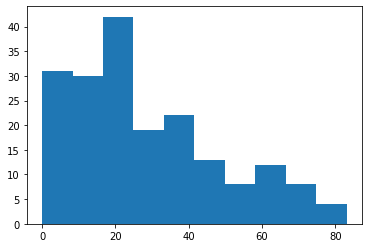

In [11]:
matplotlib.pyplot.hist(y)

In [12]:
X.describe()

,crystal radius,Pauling Electronegativity,FE,OE,valence s,valence p,valence d,valence f,specific heat,thermal conductivity,Cohesive energy,GHSV,H2CO,Temp
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.711058,1.605767,-0.147834,-1.652677,1.523810,0.142857,4.677249,2.174603,0.669593,97.284656,4.062011,10055.555556,1.903704,299.523810
std,0.285001,0.644270,0.246613,0.836174,0.656971,0.490022,3.452807,5.050404,1.076286,89.930121,2.008224,2665.307721,0.196071,30.376463
min,0.000000,0.000000,-0.771000,-3.938000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3300.000000,1.800000,255.000000
25%,0.690000,1.100000,-0.189000,-2.067000,1.000000,0.000000,0.000000,0.000000,0.190000,66.600000,3.140000,7500.000000,1.800000,275.000000
50%,0.710000,1.830000,-0.041300,-1.907000,2.000000,0.000000,6.000000,0.000000,0.380000,80.200000,4.280000,11000.000000,1.800000,302.000000
75%,0.790000,2.010000,0.000000,-0.994000,2.000000,0.000000,7.000000,0.000000,0.440000,117.000000,5.310000,11000.000000,1.900000,324.000000
max,1.360000,2.280000,0.082400,0.000000,2.000000,2.000000,10.000000,14.000000,3.600000,401.000000,6.940000,15000.000000,2.600000,402.000000


In [13]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)


<AxesSubplot:>

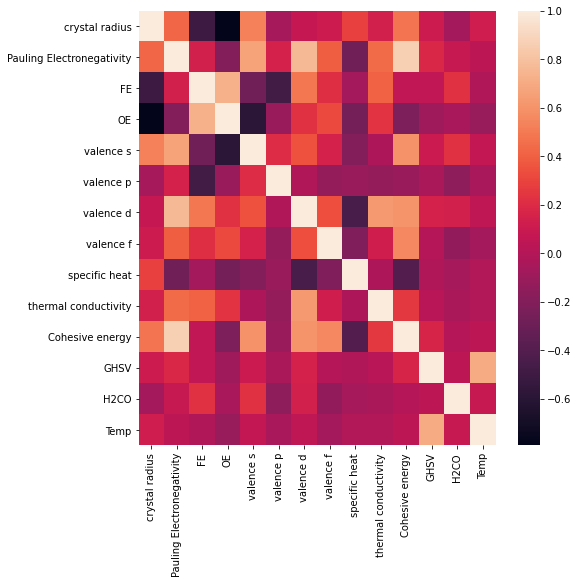

In [14]:
#Idenitfy corelated independent variables through heatmap
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(corrmat)

#plt.savefig("Heatmap.png",dpi=300)

In [15]:
X_train.count()
#X_train.shape

crystal radius               160
Pauling Electronegativity    160
FE                           160
OE                           160
valence s                    160
valence p                    160
valence d                    160
valence f                    160
specific heat                160
thermal conductivity         160
Cohesive energy              160
GHSV                         160
H2CO                         160
Temp                         160
dtype: int64

The training R2 is:  0.9732871662352012
The test R2 is:  0.9220866282543674
MSE: 30.61
RMSE of test set: 5.53
RMSE of train set: 3.36
The mean accuracy is:  0.7760771728827895


C:\Users\msuvarna\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


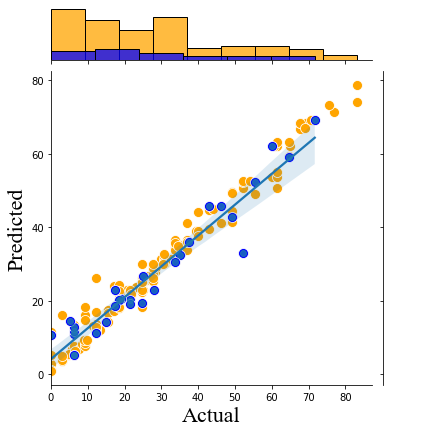

In [16]:
# Fitting RandomForest Regression to the Training set


from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor()
model.fit(X_train, y_train)


#Measure the R2 for training and test set
model_score = model.score(X_train,y_train)
print("The training R2 is: ", model.score(X_train, y_train))
print("The test R2 is: ", model.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = model.predict(X_test)
y_predicted_train = model.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())

#Plotting the joint plot of  actual v/s predicted
pp_tr = model.predict(X_train)

from sklearn.metrics import mean_squared_error, r2_score
g = sns.JointGrid(y_test, y_predicted)
sns.scatterplot(x=y_train, y=pp_tr, s=100, color='orange', ax=g.ax_joint)
sns.scatterplot(x=y_test, y=y_predicted, s=100, color='blue', ax=g.ax_joint)
sns.regplot(x=y_test, y=y_predicted, ax=g.ax_joint)
#sns.lineplot(x=y_test, y=y_predicted, ax=g.ax_joint)


#g.ax_joint.legend(["Test", "Train"])
g.set_axis_labels("Actual", "Predicted", fontsize =22, fontname = 'Times New Roman')
sns.histplot(x=y_train,ax=g.ax_marg_x, color ='orange')
sns.histplot(x=y_test, ax=g.ax_marg_x, color ='blue')

#g.ax_marg_x.legend(["Train", "Test"])
#g.ax_marg_x.set_title("KDE plots of Train & Test data")

plt.locator_params(tight=None, nbins=5)
plt.show()

The training R2 is: 0.974
The test R2 is: 0.943 
MSE: 22.25
RMSE of test set: 4.72
RMSE of train set: 3.31
The mean accuracy is:  0.8464954541352215


C:\Users\msuvarna\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


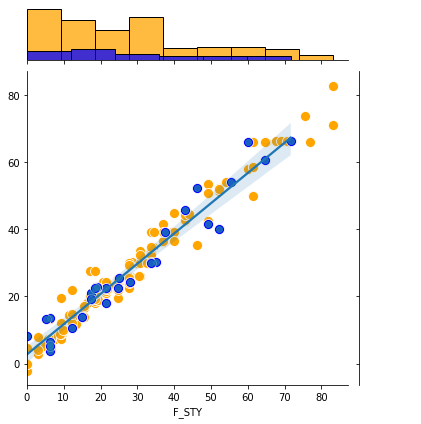

In [17]:
# Fitting GBDT Regression to training data

from sklearn.ensemble import GradientBoostingRegressor
modelGBT =  GradientBoostingRegressor()

modelGBT.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = modelGBT.score(X_train,y_train)
print("The training R2 is: %.3f" % modelGBT.score(X_train, y_train))
print("The test R2 is: %.3f "% modelGBT.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = modelGBT.predict(X_test)
y_predicted_train = modelGBT.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelGBT, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plotting the joint plot of  actual v/s predicted
pp_tr = modelGBT.predict(X_train)

from sklearn.metrics import mean_squared_error, r2_score
g = sns.JointGrid(y_test, y_predicted)
sns.scatterplot(x=y_train, y=pp_tr, s=100, color='orange', ax=g.ax_joint)
sns.scatterplot(x=y_test, y=y_predicted, s=100, color='blue', ax=g.ax_joint)
sns.regplot(x=y_test, y=y_predicted, ax=g.ax_joint)
#sns.lineplot(x=y_test, y=y_predicted, ax=g.ax_joint)


#g.ax_joint.legend(["Test", "Train"])
#g.set_axis_labels("Actual", "Predicted", fontsize =22, fontname = 'Times New Roman')
sns.histplot(x=y_train,ax=g.ax_marg_x, color ='orange')
sns.histplot(x=y_test, ax=g.ax_marg_x, color ='blue')

#g.ax_marg_x.legend(["Train", "Test"])
#g.ax_marg_x.set_title("KDE plots of Train & Test data")

plt.locator_params(tight=None, nbins=5)
plt.show()

# Hyperparameter tuning

In [18]:
#Grid search
from sklearn.model_selection import GridSearchCV

In [19]:
#Grid search for RF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state=0)
model = RandomForestRegressor()


param_grid={'n_estimators':np.arange(100,1001,100).tolist(),
                'max_features':["sqrt"],
                'max_depth':[20,40,60,80],
                'min_samples_split':[2,4,6,8,10]}

tuning = GridSearchCV(estimator=model, 
                          param_grid = param_grid,
                          cv=5,
                          verbose=1,
                          n_jobs=-1)
    

tuning.fit(X_train, y_train)

print("Best parameters:")
print(tuning.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters:
{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


The training R2 is:  0.9696459460954145
The test R2 is:  0.9395033687409751
MSE: 23.76
RMSE of test set: 4.87
RMSE of train set: 3.58
The mean accuracy is:  0.7762882932379866


C:\Users\msuvarna\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


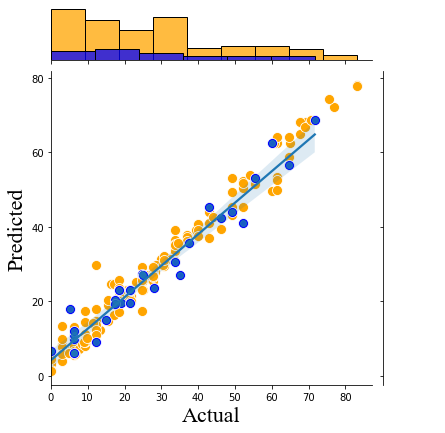

In [20]:
# Fitting RandomForest Regression with optimized parameters


from sklearn.ensemble import RandomForestRegressor

modelRF =  RandomForestRegressor(max_depth = 60, max_features = 'sqrt', min_samples_split = 2, n_estimators = 100)
modelRF.fit(X_train, y_train)


#Measure the R2 for training and test set
model_score = modelRF.score(X_train,y_train)
print("The training R2 is: ", modelRF.score(X_train, y_train))
print("The test R2 is: ", modelRF.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = modelRF.predict(X_test)
y_predicted_train = modelRF.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelRF, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())

#Plotting the joint plot of  actual v/s predicted
pp_tr = modelRF.predict(X_train)

from sklearn.metrics import mean_squared_error, r2_score
g = sns.JointGrid(y_test, y_predicted)
sns.scatterplot(x=y_train, y=pp_tr, s=100, color='orange', ax=g.ax_joint)
sns.scatterplot(x=y_test, y=y_predicted, s=100, color='blue', ax=g.ax_joint)
sns.regplot(x=y_test, y=y_predicted, ax=g.ax_joint)
#sns.lineplot(x=y_test, y=y_predicted, ax=g.ax_joint)


#g.ax_joint.legend(["Test", "Train"])
g.set_axis_labels("Actual", "Predicted", fontsize =22, fontname = 'Times New Roman')
sns.histplot(x=y_train,ax=g.ax_marg_x, color ='orange')
sns.histplot(x=y_test, ax=g.ax_marg_x, color ='blue')

#g.ax_marg_x.legend(["Train", "Test"])
#g.ax_marg_x.set_title("KDE plots of Train & Test data")

plt.locator_params(tight=None, nbins=5)
plt.show()

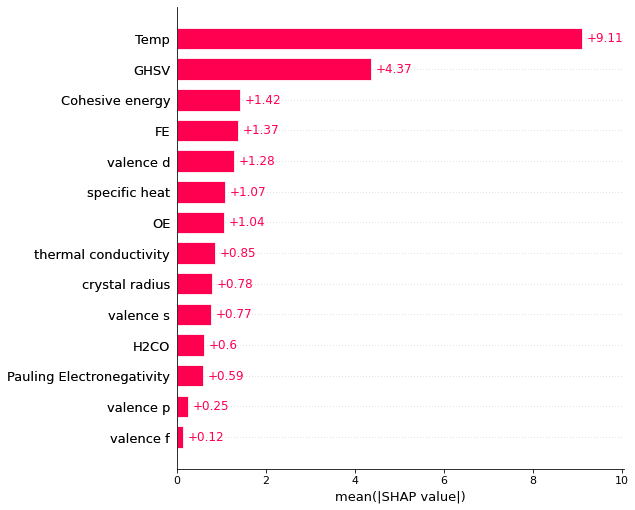

In [21]:
import shap

explainer1 = shap.Explainer(modelRF)
shap_values1 = explainer1(X_train)

shap.plots.bar(shap_values1, max_display=15)

In [23]:
train_A =pd.DataFrame(y_train)
test_A =pd.DataFrame(y_test)

train_P = pd.DataFrame(y_predicted_train)
test_P = pd.DataFrame(y_predicted)

with pd.ExcelWriter('RF RESULTS HA_STY.xlsx') as writer:  
    train_A.to_excel(writer, sheet_name='actual train')
    test_A.to_excel(writer, sheet_name='actual test')
    
    train_P.to_excel(writer, sheet_name='predicted train')
    test_P.to_excel(writer, sheet_name='predicted test')

In [22]:
#Grid search for GBDT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 22)

model = GradientBoostingRegressor()

param_grid = {'learning_rate':[0.1,0.15,0.2],
              'n_estimators':np.arange(100,1001,100).tolist(),
                 'max_depth':[2,4,6,8],
                 'min_samples_leaf':[1,2],
                 }

tuning = GridSearchCV(estimator=model, 
                          param_grid = param_grid,
                          cv=5,
                          verbose=1,
                          n_jobs=-1)
    
tuning.fit(X_train, y_train)

print("Best parameters:")
print(tuning.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters:
{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 400}


The training R2 is: 0.999
The test R2 is: 0.831 
MSE: 50.13
RMSE of test set: 7.08
RMSE of train set: 0.62
The mean accuracy is:  0.7449315750667205


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


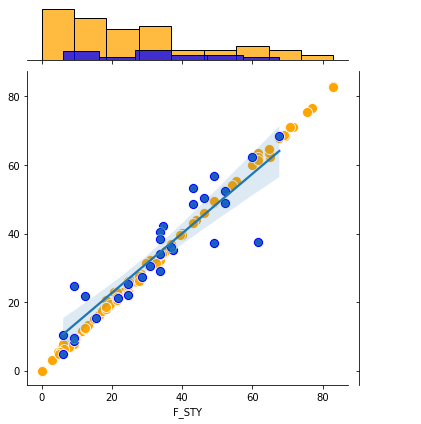

In [23]:
# Fitting GBDT Regression to training data

from sklearn.ensemble import GradientBoostingRegressor
modelGBT_0 =  GradientBoostingRegressor(learning_rate = 0.1, max_depth = 4, min_samples_leaf = 1, n_estimators = 400)

modelGBT_0.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = modelGBT_0.score(X_train,y_train)
print("The training R2 is: %.3f" % modelGBT_0.score(X_train, y_train))
print("The test R2 is: %.3f "% modelGBT_0.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = modelGBT_0.predict(X_test)
y_predicted_train = modelGBT_0.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelGBT_0, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plotting the joint plot of  actual v/s predicted
pp_tr = modelGBT_0.predict(X_train)

from sklearn.metrics import mean_squared_error, r2_score
g = sns.JointGrid(y_test, y_predicted)
sns.scatterplot(x=y_train, y=pp_tr, s=100, color='orange', ax=g.ax_joint)
sns.scatterplot(x=y_test, y=y_predicted, s=100, color='blue', ax=g.ax_joint)
sns.regplot(x=y_test, y=y_predicted, ax=g.ax_joint)
#sns.lineplot(x=y_test, y=y_predicted, ax=g.ax_joint)


#g.ax_joint.legend(["Test", "Train"])
#g.set_axis_labels("Actual", "Predicted", fontsize =22, fontname = 'Times New Roman')
sns.histplot(x=y_train,ax=g.ax_marg_x, color ='orange')
sns.histplot(x=y_test, ax=g.ax_marg_x, color ='blue')

#g.ax_marg_x.legend(["Train", "Test"])
#g.ax_marg_x.set_title("KDE plots of Train & Test data")

plt.locator_params(tight=None, nbins=5)
plt.show()

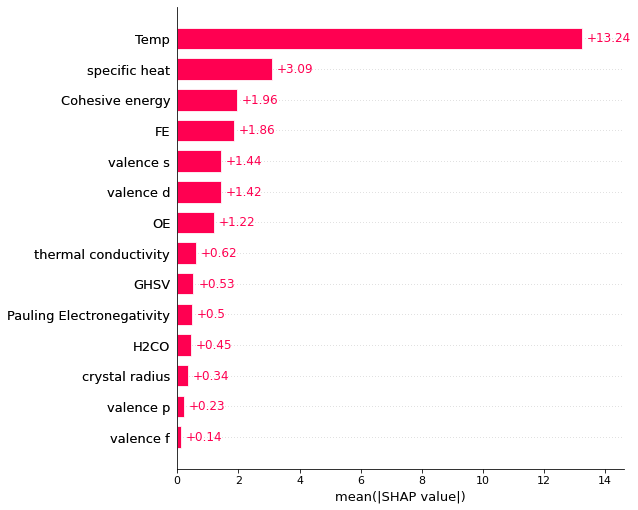

In [24]:
import shap

explainer2 = shap.Explainer(modelGBT_0)
shap_values2 = explainer2(X_train)

shap.plots.bar(shap_values2, max_display=15)

# Retrain on entire data for RF

In [25]:
len(y)

189

In [26]:
#Grid search for RF

X,y
model = RandomForestRegressor()


param_grid={'n_estimators':np.arange(100,1001,100).tolist(),
                'max_features':["sqrt"],
                'max_depth':[20,40,60,80],
                'min_samples_split':[2,4,6,8,10]}

tuning = GridSearchCV(estimator=model, 
                          param_grid = param_grid,
                          cv=5,
                          verbose=1,
                          n_jobs=-1)
    

tuning.fit(X, y)

print("Best parameters:")
print(tuning.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters:
{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}


In [27]:
# Fitting RandomForest Regression to the Training set


from sklearn.ensemble import RandomForestRegressor
model_full =  RandomForestRegressor(max_depth = 60, max_features = 'sqrt', min_samples_split = 2, n_estimators = 300)
model_full.fit(X, y)


#Measure the R2 for training and test set
model_score = model_full.score(X,y)

print("The training R2 is: ", model_full.score(X, y))
#print("The test R2 is: ", model.score(X, y))

from sklearn.metrics import mean_squared_error
from math import sqrt



y_predicted_all = model_full.predict(X)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y, y_predicted_all))

print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y, y_predicted_all)))


#k-cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = model_full, X=X, y=y, cv=5, scoring=('r2'), return_train_score=True)
accuracies = cross_val_score(estimator = model_full, X = X, y= y, cv=5)
#print("The mean accuracy is: ", accuracies.mean())
print(scores)

The training R2 is:  0.9770868628595196
MSE: 9.58
RMSE of train set: 3.09
{'fit_time': array([0.57289815, 0.61635256, 0.61291814, 0.60675621, 0.6363759 ]), 'score_time': array([0.03278375, 0.03834462, 0.03536224, 0.03209352, 0.03228569]), 'test_score': array([0.61113197, 0.80745874, 0.81062851, 0.30836802, 0.23986859]), 'train_score': array([0.97425429, 0.96456232, 0.96892622, 0.97751091, 0.9841698 ])}


In [28]:
print("The mean accuracy is: ", accuracies.mean())
accuracies

The mean accuracy is:  0.5480070798497649


array([0.5964704 , 0.79588486, 0.82317353, 0.30459722, 0.21990938])

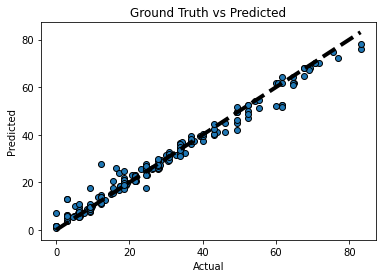

In [29]:
fig, ax = plt.subplots()
ax.scatter(y, y_predicted_all, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

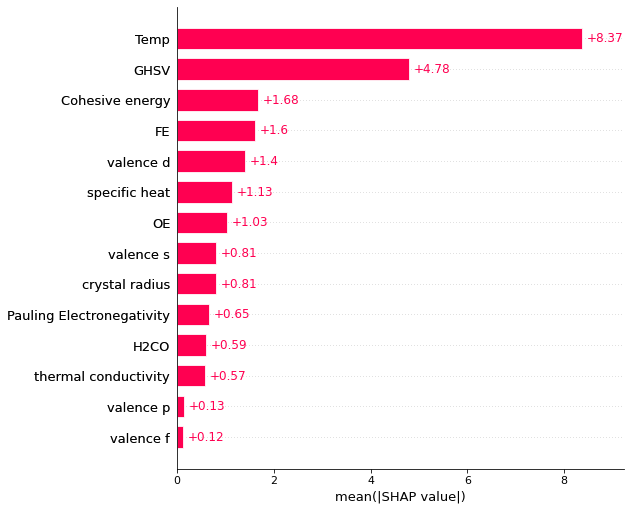

In [30]:
import shap

explainer = shap.Explainer(model_full)
shap_values = explainer(X)

shap.plots.bar(shap_values, max_display=15)

In [28]:
from sklearn.inspection import PartialDependenceDisplay

(255.0, 400.0)

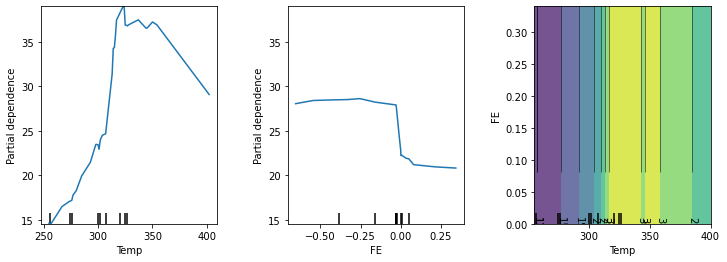

In [36]:
features = ['Temp', 'FE', ('Temp', 'FE')]
_,ax = plt.subplots(ncols=3,figsize=(12,4))
display=PartialDependenceDisplay.from_estimator(model_full, X, features,ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

plt.ylim(0, 0.34,0.085)
plt.xlim(255,400)
#plt.savefig("PDP11.svg",dpi=600)

(255.0, 400.0)

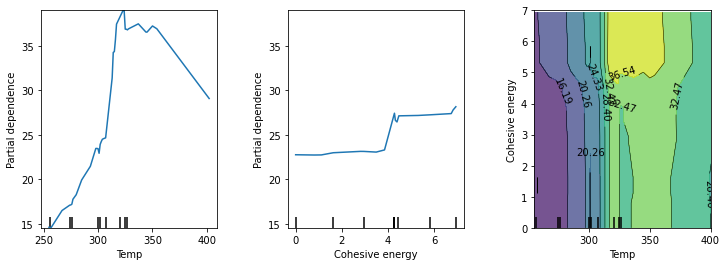

In [46]:
features = ['Temp', 'Cohesive energy', ('Temp', 'Cohesive energy')]
_,ax = plt.subplots(ncols=3,figsize=(12,4))
display=PartialDependenceDisplay.from_estimator(model_full, X, features,ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

plt.ylim(0, 7,1)
plt.xlim(255,400)
#plt.savefig("PDP11.svg",dpi=600)

(3300.0, 15000.0)

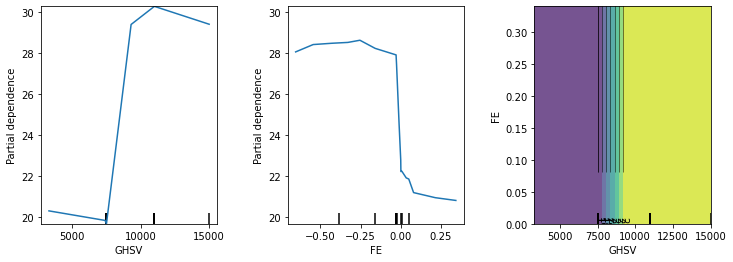

In [47]:
features = ['GHSV', 'FE', ('GHSV', 'FE')]
_,ax = plt.subplots(ncols=3,figsize=(12,4))
display=PartialDependenceDisplay.from_estimator(model_full, X, features,ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

plt.ylim(0, 0.34,0.085)
plt.xlim(3300,15000)
#plt.savefig("PDP11.svg",dpi=600)

(3300.0, 15000.0)

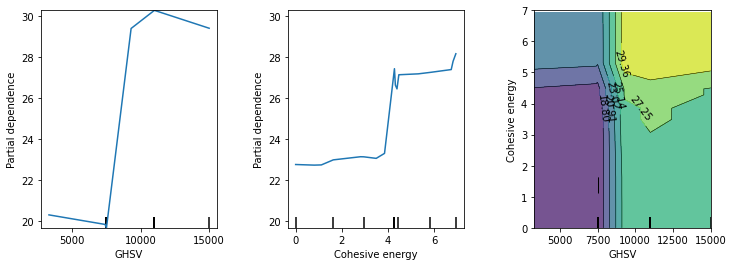

In [48]:
features = ['GHSV', 'Cohesive energy', ('GHSV', 'Cohesive energy')]
_,ax = plt.subplots(ncols=3,figsize=(12,4))
display=PartialDependenceDisplay.from_estimator(model_full, X, features,ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

plt.ylim(0, 7,1)
plt.xlim(3300,15000)
#plt.savefig("PDP11.svg",dpi=600)

(0.0, 7.0)

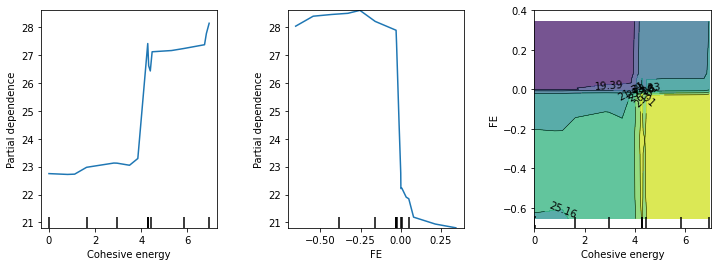

In [57]:
features = ['Cohesive energy', 'FE',('Cohesive energy', 'FE')]
_,ax = plt.subplots(ncols=3,figsize=(12,4))
display=PartialDependenceDisplay.from_estimator(model_full, X, features,ax=ax)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)


plt.ylim(-0.7, 0.4)
plt.xlim(0, 7,1)
#plt.savefig("PDP11.svg",dpi=600)

# Extrapolating to 7 new promoters

In [31]:
Expdata = pd.read_excel('PNNL data_redone_final test.xlsx', sheet_name ='Test promoters')

In [32]:
Expdata.head()

,P1,FE,OE,Covalent Radius,ionic radius,crystal radius,Pauling Electronegativity,MB electonegativity,metallic valence,valence electrons,...,SC2+ Oxy,Smethane,SHC,STY,C2OXY_STY,TOT_X2OXY,F_STY,F_C2OXY,F_TOT,Alcohol Ratio
0,Ni,0.0702,-0.894,1.21,1.35,0.7,1.91,1.76,5.78,10,...,46.05,33.41,10.83,21,112,133,6.461538,34.461538,40.923077,0.187500
1,Ni,0.0702,-0.894,1.21,1.35,0.7,1.91,1.76,5.78,10,...,37.72,36.85,17.48,36,192,228,11.076923,59.076923,70.153846,0.187500
2,Ni,0.0702,-0.894,1.21,1.35,0.7,1.91,1.76,5.78,10,...,24.17,51.32,15.91,65,202,267,20.000000,62.153846,82.153846,0.321782
3,Ni,0.0702,-0.894,1.21,1.35,0.7,1.91,1.76,5.78,10,...,28.57,46.16,14.16,86,236,322,26.461538,72.615385,99.076923,0.364407
4,Ni,0.0702,-0.894,1.21,1.35,0.7,1.91,1.76,5.78,10,...,20.60,56.10,11.44,169,307,476,52.000000,94.461538,146.461538,0.550489


In [33]:
len(Expdata)

41

In [34]:
X1 = Expdata[["crystal radius",
          'Pauling Electronegativity','FE','OE',
          'valence s','valence p',"valence d",'valence f','specific heat',
          "thermal conductivity","Cohesive energy",
          "GHSV","H2CO","Temp"]]
y1 = Expdata['F_STY']


In [35]:
X1.head()

,crystal radius,Pauling Electronegativity,FE,OE,valence s,valence p,valence d,valence f,specific heat,thermal conductivity,Cohesive energy,GHSV,H2CO,Temp
0,0.7,1.91,0.0702,-0.894,2,0,8,0,0.44,90.7,4.44,7500,1.8,256.0
1,0.7,1.91,0.0702,-0.894,2,0,8,0,0.44,90.7,4.44,7500,1.8,277.0
2,0.7,1.91,0.0702,-0.894,2,0,8,0,0.44,90.7,4.44,11000,1.8,300.0
3,0.7,1.91,0.0702,-0.894,2,0,8,0,0.44,90.7,4.44,11000,1.8,305.0
4,0.7,1.91,0.0702,-0.894,2,0,8,0,0.44,90.7,4.44,11000,1.8,325.0


In [36]:
Exp_pred=modelRF.predict(X1) #make prediction on lab experimental data

Pred_exp= pd.DataFrame(Exp_pred)
Pred_exp

,0
0,9.933333
1,14.205978
2,26.107692
3,26.716923
4,42.473846
5,23.357773
6,14.205978
7,9.933333
8,14.205978
9,26.107692


In [37]:
# Erro metrics on experimental validation 
from sklearn.metrics import mean_absolute_error
print("The test R2 is: ", modelRF.score(X1, y1))

print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y1, Exp_pred)))


The test R2 is:  0.640748866536017
RMSE of test set: 7.67


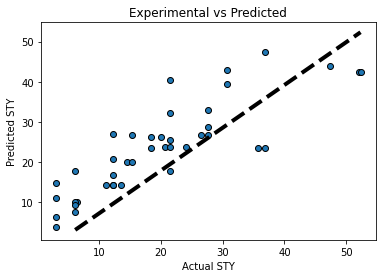

In [38]:
#Plot the actual v/s predicted
fig, ax = plt.subplots()
ax.scatter(y1, Exp_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=4)
ax.set_xlabel('Actual STY')
ax.set_ylabel('Predicted STY')
ax.set_title("Experimental vs Predicted")
plt.show()

In [41]:
finalconcat= pd.concat([y1,Pred_exp.set_index(X1.index)], axis=1)
finalconcat.to_excel("STY_ExpvsPred_RF_with Ag.xlsx")

In [44]:
Screendata = pd.read_excel('PNNL data_redone_final test.xlsx', sheet_name ='Nb')

In [45]:
Screendata.head(10)

,P1,FE,OE,Covalent Radius,ionic radius,crystal radius,Pauling Electronegativity,MB electonegativity,metallic valence,valence electrons,...,SC2+ Oxy,Smethane,SHC,STY,C2OXY_STY,TOT_X2OXY,F_STY,F_C2OXY,F_TOT,Alcohol Ratio
0,B,-0.378,-0.890,0.82,0.85,0.25,2.04,1.76,5.78,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B,-0.378,-0.890,0.82,0.85,0.25,2.04,1.76,5.78,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B,-0.378,-0.890,0.82,0.85,0.25,2.04,1.76,5.78,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B,-0.378,-0.890,0.82,0.85,0.25,2.04,1.76,5.78,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nb,-0.401,-2.212,1.37,1.45,0.78,1.60,1.76,5.78,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Nb,-0.401,-2.212,1.37,1.45,0.78,1.60,1.76,5.78,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Nb,-0.401,-2.212,1.37,1.45,0.78,1.60,1.76,5.78,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Nb,-0.401,-2.212,1.37,1.45,0.78,1.60,1.76,5.78,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
XS = Screendata[["crystal radius",
          'Pauling Electronegativity','FE','OE',
          'valence s','valence p',"valence d",'valence f','specific heat',
          "thermal conductivity","Cohesive energy",
          "GHSV","H2CO","Temp"]]


In [47]:
Screen_pred=modelRF.predict(XS) #make prediction on B amd Nb

Pred_Screen= pd.DataFrame(Screen_pred)
Pred_Screen

,0
0,9.723077
1,11.839106
2,24.627692
3,36.584872
4,20.056410
5,25.603565
6,33.701538
7,35.781538
